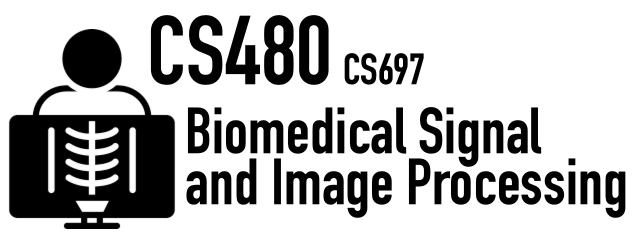
# Assignment 1


In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [9]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds!

In [4]:
# This place is for the plotting code
# taking the sampling rate into account to only plot the range
# between 9 and 11 seconds

In [10]:
ecg[0:10] # first ten values in ecg (indexing)

array([-0.245, -0.215, -0.185, -0.175, -0.17 , -0.17 , -0.185, -0.17 ,
       -0.16 , -0.15 ])

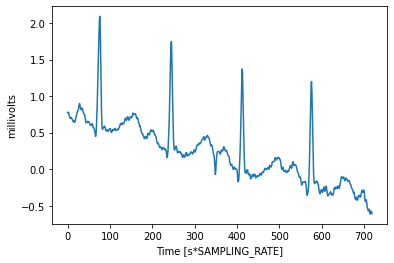

In [11]:
from9to11seconds = ecg[8*SAMPLING_RATE:10*SAMPLING_RATE]
plt.xlabel('Time [s*SAMPLING_RATE]')
plt.ylabel('millivolts')
plt.plot(from9to11seconds)

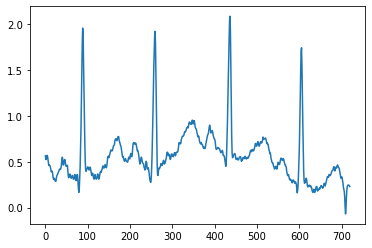

In [12]:
#take the sampling rate into account to only plot the range
# between 8 to 10 seconds.
from8to10seconds = ecg[7*SAMPLING_RATE:9*SAMPLING_RATE]
plt.plot(from8to10seconds)

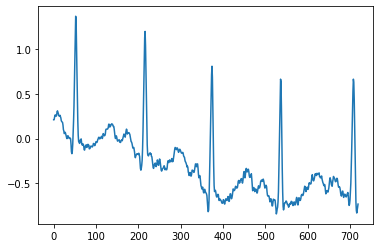

In [13]:
# take the sampling rate into account to only plot the range
# between 10 to 12 seconds.
from10to12seconds = ecg[9*SAMPLING_RATE:11*SAMPLING_RATE]
plt.plot(from10to12seconds)

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [118]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [14]:
# we now need to install the neurokit2 library
# !pip install neurokit2
import neurokit2 as nk

In [15]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [16]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


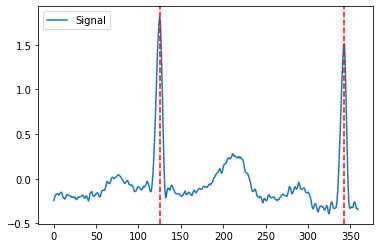

In [17]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

In [30]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

In [18]:
# declar variables
begin = 8*SAMPLING_RATE-100 # Minimum needed for neurokit to detect the first peak
end = 12*SAMPLING_RATE+100 # Only needed one extra sample to catch the last peak

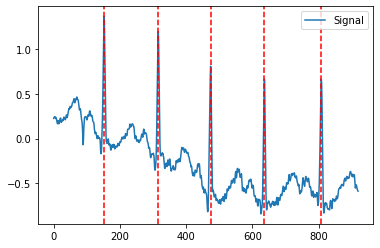

In [21]:
_, rpeaks_from9to11seconds = nk.ecg_peaks(ecg[begin:end], sampling_rate=SAMPLING_RATE)

plot = nk.events_plot(rpeaks_from9to11seconds['ECG_R_Peaks'][2:7]-SAMPLING_RATE, ecg[9*SAMPLING_RATE-100:11*SAMPLING_RATE+100])

**Task 3:** Detect Heartrate. [15 Points]

In [14]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [23]:
from statistics import mean

rpeaks_list = []
for i in range(1, rpeaks_from9to11seconds['ECG_R_Peaks'].size):
  rpeaks_list.append(rpeaks_from9to11seconds['ECG_R_Peaks'][i] - rpeaks_from9to11seconds['ECG_R_Peaks'][i-1])
print("Min Heart Rate: " + str(60/(max(average_size) / SAMPLING_RATE)) + " Beats Per Minute ")
print("Max Heart Rate: " + str(60/(min(average_size) / SAMPLING_RATE)) + " Beats Per Minute ")
print("Mean Heart Rate: " + str(60/(mean(average_size) / SAMPLING_RATE)) + " Beats Per Minute ")

Min Heart Rate: 14.285714285714285 Beats Per Minute 
Max Heart Rate: 144.96644295302013 Beats Per Minute 
Mean Heart Rate: 100.93457943925233 Beats Per Minute 


**Task 4:** Detect P Q S T Peaks. [25 Points]

In [24]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

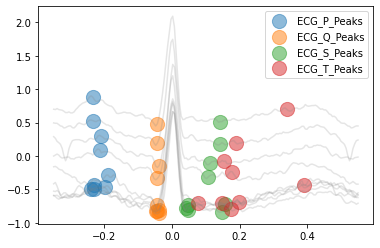

In [31]:
_, waves_peak = nk.ecg_delineate(ecg[begin:end], rpeaks_from9to11seconds, sampling_rate=1000/5, show=True, show_type='peaks')

In [34]:
# TODO Does the detection work well?
# The detection works well but the graph has difficulties to observe.

**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

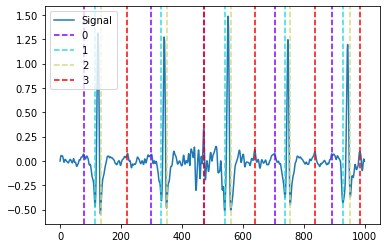

In [34]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.
filtered_signal = nk.signal_filter(ecg[:1000], sampling_rate=SAMPLING_RATE, lowcut= 7,highcut= 50)

_, filtered = nk.ecg_delineate(filtered_signal, rpeaks['ECG_R_Peaks'][:5], sampling_rate=SAMPLING_RATE, show_type='peaks')
plot = nk.events_plot([filtered['ECG_P_Peaks'],
                       filtered['ECG_Q_Peaks'],
                       filtered['ECG_S_Peaks'],
                       filtered['ECG_T_Peaks']], filtered_signal)

In [37]:
# TODO Does the filtering improve the result?
# My filtering may not work as expected.

In [38]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#